In [14]:
import os
import re
from tqdm import tqdm
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from keras.layers import Embedding
from  keras . utils  import  to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D,Conv2D, MaxPooling1D, Embedding, Flatten
from keras.models import Model
from keras.initializers import Constant
from keras.layers import Embedding


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [16]:
import pandas as pd 
train_data=pd.read_csv('gdrive/My Drive/Colab Notebooks/ulm_train.csv')
stopwords=pd.read_csv('gdrive/My Drive/Colab Notebooks/Stopwords.csv')
test_data=pd.read_csv('gdrive/My Drive/Colab Notebooks/ulm_test.csv')


In [17]:
!git clone -l -s https://github.com/banglakit/bengali-stemmer.git

fatal: destination path 'bengali-stemmer' already exists and is not an empty directory.


In [18]:
!pip install git+https://github.com/banglakit/bengali-stemmer.git    

  Cloning https://github.com/banglakit/bengali-stemmer.git to /tmp/pip-req-build-sa78t9ps
  Running command git clone -q https://github.com/banglakit/bengali-stemmer.git /tmp/pip-req-build-sa78t9ps
  Created wheel for bengali-stemmer: filename=bengali_stemmer-0.0.1-py2.py3-none-any.whl size=6393 sha256=f2ea1a7f384fbc241b1d9c4d92d0e97440dff41debd865b6cb90631a52b5aab2
  Stored in directory: /tmp/pip-ephem-wheel-cache-auca6l9v/wheels/a1/ad/a1/4ba354059b17c00600a14e13a504e7bdb49f20f2f4e2f3639c
Successfully built bengali-stemmer


In [19]:
from bengali_stemmer.rafikamal2014 import RafiStemmer
stemmer = RafiStemmer()
stemmer.stem_word('বাংলায়')

'বাংলা'

In [20]:
total_data = train_data
total_data=total_data.append(test_data, ignore_index = True)

In [21]:
macronum=sorted(set(total_data['label']))
macro_to_id = dict((note, number) for number, note in enumerate(macronum))

def fun(i):
    return macro_to_id[i]

total_data['label']=total_data['label'].apply(fun)


In [22]:
texts = list(total_data['text'])
labels = list(total_data['label'])

In [23]:
def clean_punct(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#|।|’|‘]', r'', sentence)
    cleaned1 = re.sub(r'[.|,|(|)|\|/]', r'', cleaned)
    cleaned = re.sub(r'[০|১|২|৩|৪|৫|৬|৭|৮|৯]', r'', cleaned1)
    cleaned1 = re.sub(r'[-|=]', r' ', cleaned)
    return cleaned1

In [24]:
set_stop = set(stopwords['words'])

In [25]:

def pre_process(data):
    i=0
    str1=' '
    final_string = []
    final_words = []
    all_negative_words = []
    s=''

    for sentence in data:
        filtered_sentence = []

        for w in sentence.split():
            for cleaned_word in clean_punct(w).split():
                if len(cleaned_word)>2:
                    if((cleaned_word) not in set_stop):
                        s = stemmer.stem_word(cleaned_word)
                        if len(s)>2:
                            final_words.append(s)
                            filtered_sentence.append(s)
                    else:
                        continue
                else:
                    continue

        str1 = " ".join(filtered_sentence)
        final_string.append(str1)
    return final_string

In [26]:
texts = pre_process(texts)

In [27]:
texts[0]

'সাম্প্রদায়িক সংঘাত মানবিক প্রতিরোধ সাম্প্রদায়িক সংঘাত মানবিক প্রতিরোধফকির ইলিয়াস দেশ থাকি বহুজাতিক বহুভাষিক মানুষ বাস ধর্মাবলম্বী মতাবলম্বী মানুষ কারো কারো মিল চাইল সামান্য বিষ প্রতিদিন দাঙ্গা তেমন হ্যাঁ প্রি পাঠক মার্কিন যুক্তরাষ্ট্র কথা বলছিএ দেশ মানুষ মানুষ বুক পাঁজর চিবি দেশ কঠোর আইন থাক পার পারব পারব কঠিন শাস্তির মুখোমুখি জীবনবাজি রায়ট কেপাক ভারত উপমহাদেশ জন্ম বিভক্ত রায়ট মধ্য কারোর অজানা জন্মইতিহাস জন্ম পাকিস্তান ভারত পরবর্তীকাল বাংলাদেশ ভূখণ্ড দ্বিজাতি তত্ত্ব শত্রু সম্পত্তি আইন মানুষ মানুষ ধর্ম বিভাজন সেভাব পরিকল্পিতভাব সাল ভারত ভাগ অসংখ্য হিন্দু ঘরবাড়ি ছেড় গিয় জিন্নাহর দ্বিজাতি তত্ত্ব ভিত্তি ওঠা দেশ অস্তিত্ব রক্ষা প্রশ্ন প্রথম সাল পূর্বতন পূর্ব পাকিস্তান সাম্প্রদায়িক দাঙ্গ হিন্দু নিরাপত্ত পালি সাল হিন্দু আওয়ামী লীগ ভোট বিশ্বাস দখলদ পাক সেনা সহযোগী প্রবল প্রতিশোধস্পৃহা খুঁজ খুঁজ হিন্দু নিধন চালি হিন্দু বুদ্ধিজীবী সমাজসেবী শ্রদ্ধে ব্যক্তিত্ব ঢাকা বিশ্ববিদ্যালয় জগন্নাথ সহস্রাধিক হিন্দু ছাত্র হত্যা সাল নভেম্বর তারিখ ইউএস সিনেট কমি প্রামাণ্য প্রতিবেদন সিনেটর এডওয়ার্ড কেনেডি লিখ “সব

In [28]:
def load_data(num_words, sequence_length, test_size=0.25, oov_token=None):
    tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
    num_classes=6
    y = to_categorical(np.asarray(labels), num_classes)
    tokenizer.fit_on_texts(texts)
    X = tokenizer.texts_to_sequences(texts)
    X = np.array(X)
    # pad sequences with 0's
    X = pad_sequences(X, maxlen=sequence_length)
    # split data to training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
    data = {}
    data["X_train"] = X_train
    data["X_test"]= X_test
    data["y_train"] = y_train
    data["y_test"] = y_test
    data["tokenizer"] = tokenizer
    return data

In [29]:
# train_data=pd.read_csv('gdrive/My Drive/Colab Notebooks/ulm_train.csv')

def get_embedding_vectors(word_index, embedding_size=100):
    
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_size))
    with open(f"gdrive/My Drive/Colab Notebooks/bn_glove.{embedding_size}d.txt", encoding="utf8") as f:
        for line in tqdm(f, "Reading GloVe"):
            values = line.split()
            # get the word as the first word in the line
            word = values[0]
            if word in word_index:
                idx = word_index[word]
                # get the vectors as the remaining values in the line
                embedding_matrix[idx] = np.array(values[1:], dtype="float32")
    return embedding_matrix

In [30]:
MAX_SEQUENCE_LENGTH = 11276    #max([len(s.split()) for s in texts]) 
MAX_NUM_WORDS = 109804   # 109803 +1
vocab_size = MAX_NUM_WORDS
EMBEDDING_DIM = 300
VALIDATION_SPLIT = 0.2

data = load_data(MAX_NUM_WORDS , MAX_SEQUENCE_LENGTH,VALIDATION_SPLIT)

In [31]:
len(data['tokenizer'].word_index)

109803

In [32]:
embedding_matrix = get_embedding_vectors( data['tokenizer'].word_index ,EMBEDDING_DIM )

Reading GloVe: 134256it [00:08, 16615.59it/s]


In [33]:
embedding_layer = Embedding(len(data['tokenizer'].word_index) + 1,  # or we can use 'MAX_NUM_WORDS'
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [ ]:

'''
print('Training model.')

# train a 1D convnet with global maxpooling
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(35)(x)  # global max pooling
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(6, activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',   # using 'rmsprop' optimizer
              metrics=['acc'])
'''

In [ ]:
#model.fit(data['X_train'], data['y_train'], validation_data=(data['X_test'], data['y_test']),epochs=5, batch_size=128)

In [34]:
# define model
model = Sequential()
model.add(embedding_layer)
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(64)))
model.add(Flatten())
model.add(Dense(6, activation='softmax'))
print(model.summary())


'''
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(13, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

'''

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 11276, 300)        32941200  
_________________________________________________________________
conv1d (Conv1D)              (None, 11272, 128)        192128    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5636, 128)         0         
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 6)                 774       
Total params: 33,232,918
Trainable params: 291,718
Non-trainable params: 32,941,200
______________________________________

"\nmodel = Sequential()\nmodel.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))\nmodel.add(SpatialDropout1D(0.2))\nmodel.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))\nmodel.add(Dense(13, activation='softmax'))\nmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])\n\nepochs = 5\nbatch_size = 64\n\n"

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # using adma optimizer


In [ ]:
#history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

history = model.fit(data['X_train'], data['y_train'], validation_data=(data['X_test'], data['y_test']), epochs=5, verbose=2)


Epoch 1/5
53/53 - 29s - loss: 1.2180 - accuracy: 0.5554 - val_loss: 1.0330 - val_accuracy: 0.5952
Epoch 2/5
53/53 - 28s - loss: 0.8436 - accuracy: 0.6804 - val_loss: 0.8458 - val_accuracy: 0.6929
Epoch 3/5
53/53 - 28s - loss: 0.6159 - accuracy: 0.7869 - val_loss: 0.7848 - val_accuracy: 0.7190
Epoch 4/5
53/53 - 28s - loss: 0.4891 - accuracy: 0.8381 - val_loss: 0.8269 - val_accuracy: 0.7095
Epoch 5/5
53/53 - 28s - loss: 0.3549 - accuracy: 0.8917 - val_loss: 0.7996 - val_accuracy: 0.7429


In [ ]:
#history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
# don't take count this epoch's
history = model.fit(data['X_train'], data['y_train'], validation_data=(data['X_test'], data['y_test']), epochs=10, verbose=2)

Epoch 1/10
53/53 - 29s - loss: 1.2479 - accuracy: 0.5220 - val_loss: 1.0181 - val_accuracy: 0.6524
Epoch 2/10
53/53 - 28s - loss: 0.8068 - accuracy: 0.7065 - val_loss: 0.8180 - val_accuracy: 0.7024
Epoch 3/10
53/53 - 28s - loss: 0.5850 - accuracy: 0.7994 - val_loss: 0.7837 - val_accuracy: 0.7429
Epoch 4/10
53/53 - 28s - loss: 0.4276 - accuracy: 0.8619 - val_loss: 0.8517 - val_accuracy: 0.6976
Epoch 5/10
53/53 - 28s - loss: 0.2891 - accuracy: 0.9173 - val_loss: 0.7804 - val_accuracy: 0.7452
Epoch 6/10
53/53 - 28s - loss: 0.1720 - accuracy: 0.9589 - val_loss: 0.7999 - val_accuracy: 0.7595
Epoch 7/10
53/53 - 28s - loss: 0.0926 - accuracy: 0.9810 - val_loss: 0.7680 - val_accuracy: 0.7762
Epoch 8/10
53/53 - 28s - loss: 0.0907 - accuracy: 0.9839 - val_loss: 0.8334 - val_accuracy: 0.7762
Epoch 9/10
53/53 - 28s - loss: 0.0473 - accuracy: 0.9940 - val_loss: 0.8169 - val_accuracy: 0.7643
Epoch 10/10
53/53 - 28s - loss: 0.0244 - accuracy: 0.9964 - val_loss: 0.9138 - val_accuracy: 0.7381


In [ ]:
# define model, use 100 lstm units
model = Sequential()
model.add(embedding_layer)
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(100)))
model.add(Flatten())
model.add(Dense(6, activation='softmax'))
print(model.summary())


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 11276, 300)        32941200  
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 11272, 128)        192128    
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 5636, 128)         0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200)               183200    
_________________________________________________________________
flatten_2 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 1206      
Total params: 33,317,734
Trainable params: 376,534
Non-trainable params: 32,941,200
____________________________________

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # using adma optimizer


In [ ]:
#history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

history = model.fit(data['X_train'], data['y_train'], validation_data=(data['X_test'], data['y_test']), epochs=5, verbose=2)

Epoch 1/5
53/53 - 33s - loss: 1.1967 - accuracy: 0.5476 - val_loss: 1.0667 - val_accuracy: 0.6119
Epoch 2/5
53/53 - 32s - loss: 0.8209 - accuracy: 0.6887 - val_loss: 0.8138 - val_accuracy: 0.7000
Epoch 3/5
53/53 - 32s - loss: 0.6061 - accuracy: 0.7845 - val_loss: 0.8804 - val_accuracy: 0.6786
Epoch 4/5
53/53 - 32s - loss: 0.4862 - accuracy: 0.8375 - val_loss: 0.7839 - val_accuracy: 0.7310
Epoch 5/5
53/53 - 32s - loss: 0.3250 - accuracy: 0.8940 - val_loss: 0.7514 - val_accuracy: 0.7333


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def confussion_mat(model):
    # Predict the values from the validation dataset
    Y_pred = model.predict(data['X_test'])
    # Convert predictions classes to one hot vectors 
    Y_pred_classes = np.argmax(Y_pred,axis = 1) 
    # Convert validation observations to one hot vectors
    Y_true = np.argmax(data['y_test'],axis = 1) 
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    # plot the confusion matrix
    f,ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

In [ ]:
def history2(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
history2(history)

In [ ]:
confussion_mat(model)

In [40]:
history = model.fit(data['X_train'], data['y_train'], validation_data=(data['X_test'], data['y_test']), epochs=2, verbose=2)


Epoch 1/2
53/53 - 30s - loss: 0.0200 - accuracy: 0.9982 - val_loss: 0.8014 - val_accuracy: 0.7857
Epoch 2/2
53/53 - 30s - loss: 0.0130 - accuracy: 0.9982 - val_loss: 0.8342 - val_accuracy: 0.7667


NameError: ignored

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


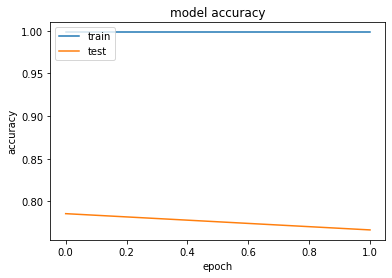

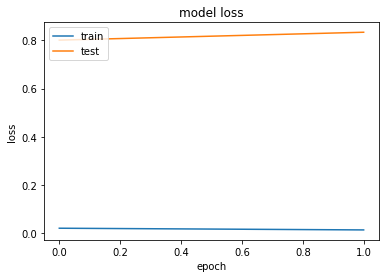

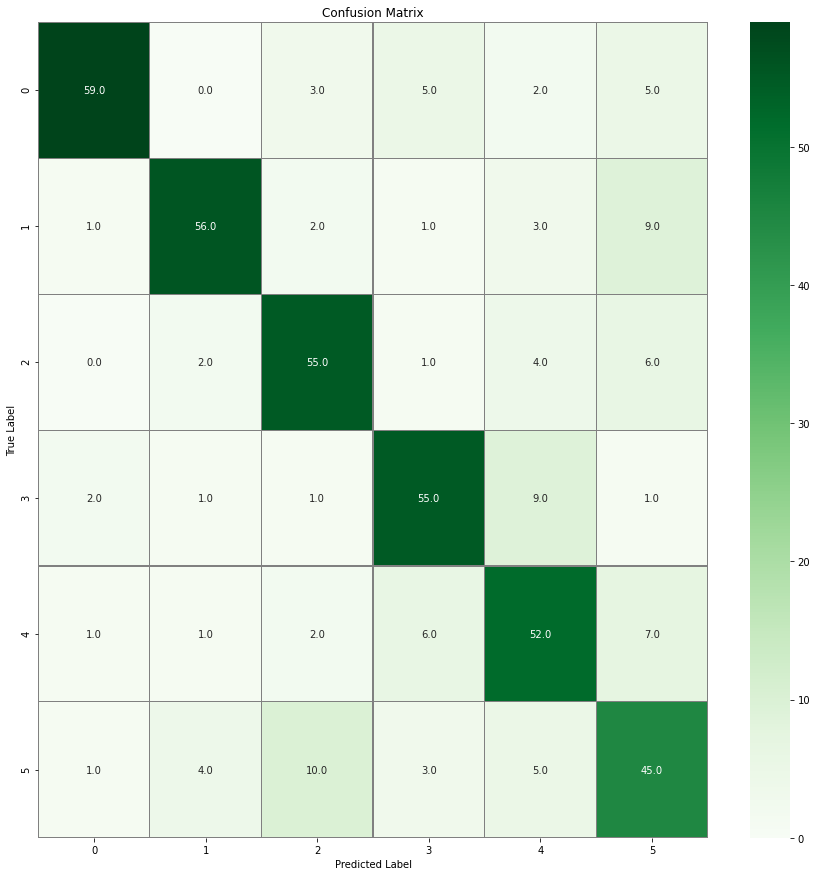

f1-score:
0.7674963499635644
precision_score:
0.7724532057259846
recall_score:
0.766064658008392
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        74
           1       0.88      0.78      0.82        72
           2       0.75      0.81      0.78        68
           3       0.77      0.80      0.79        69
           4       0.69      0.75      0.72        69
           5       0.62      0.66      0.64        68

    accuracy                           0.77       420
   macro avg       0.77      0.77      0.77       420
weighted avg       0.78      0.77      0.77       420



In [43]:
from json import dumps, loads

#filepath = "saved-model-{epoch:02d}-{val_acc:.2f}.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

model.save("trainedmodel_5Epoch.h5") # saving the model
#with open('trainHistoryOld', 'wb') as handle: # saving the history of the model
    #dump(history.history, handle)

import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def confussion_mat(model):
    # Predict the values from the validation dataset
    Y_pred = model.predict(data['X_test'])
    # Convert predictions classes to one hot vectors 
    Y_pred_classes = np.argmax(Y_pred,axis = 1) 
    # Convert validation observations to one hot vectors
    Y_true = np.argmax(data['y_test'],axis = 1) 
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    # plot the confusion matrix
    f,ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

def history2(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


history2(history)
confussion_mat(model)

Y_pred = model.predict(data['X_test'])
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(data['y_test'],axis = 1) 
# compute the confusion matrix
print("f1-score:")
print(f1_score(Y_true, Y_pred_classes, average="macro"))
print("precision_score:")
print(precision_score(Y_true, Y_pred_classes, average="macro"))
print("recall_score:")
print(recall_score(Y_true, Y_pred_classes, average="macro")) 

# print("F1-score: {:.1%}".format(f1_score(Y_true, Y_pred_classes)))
print(classification_report(Y_true, Y_pred_classes))


In [44]:
from keras.models import load_model
model = load_model('trainedmodel_5Epoch.h5')# loading model trained for 50 Epochs
hstry = model.fit(data['X_train'], data['y_train'], validation_data=(data['X_test'], data['y_test']), epochs=5, verbose=2)


Epoch 1/5
53/53 - 28s - loss: 0.0107 - accuracy: 0.9982 - val_loss: 0.8331 - val_accuracy: 0.7929
Epoch 2/5
53/53 - 28s - loss: 0.0093 - accuracy: 0.9982 - val_loss: 0.8267 - val_accuracy: 0.7786
Epoch 3/5
53/53 - 28s - loss: 0.0084 - accuracy: 0.9982 - val_loss: 0.8371 - val_accuracy: 0.7929
Epoch 4/5
53/53 - 28s - loss: 0.0077 - accuracy: 0.9976 - val_loss: 0.8456 - val_accuracy: 0.7929
Epoch 5/5
53/53 - 28s - loss: 0.0074 - accuracy: 0.9982 - val_loss: 0.8703 - val_accuracy: 0.7857


In [47]:
model.save("trainedmodel_10Epoch.h5") # saving the model
model = load_model('trainedmodel_10Epoch.h5')# loading model trained for 50 Epochs
history = model.fit(data['X_train'], data['y_train'], validation_data=(data['X_test'], data['y_test']), epochs=1, verbose=2)


53/53 - 29s - loss: 0.0101 - accuracy: 0.9982 - val_loss: 0.8246 - val_accuracy: 0.7929


In [49]:
model.save("trainedmodel_11Epoch.h5") # saving the model
model = load_model('trainedmodel_11Epoch.h5')# loading model trained for 50 Epochs
history = model.fit(data['X_train'], data['y_train'], validation_data=(data['X_test'], data['y_test']), epochs=4, verbose=2)

hist_df = pd.DataFrame(history.history) 
hist_json_file = 'history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

Epoch 1/4
53/53 - 29s - loss: 0.0091 - accuracy: 0.9976 - val_loss: 0.8410 - val_accuracy: 0.7929
Epoch 2/4
53/53 - 28s - loss: 0.0081 - accuracy: 0.9982 - val_loss: 0.8428 - val_accuracy: 0.7762
Epoch 3/4
53/53 - 28s - loss: 0.0075 - accuracy: 0.9982 - val_loss: 0.8473 - val_accuracy: 0.7905
Epoch 4/4
53/53 - 28s - loss: 0.0070 - accuracy: 0.9982 - val_loss: 0.8498 - val_accuracy: 0.7881


In [50]:
print(history.history.keys())
    # summarize history for accuracy
plt.plot(history.hist_df['accuracy'])
plt.plot(history.hist_df['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
    # summarize history for loss
plt.plot(history.hist_df['loss'])
plt.plot(history.hist_df['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


AttributeError: ignored

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


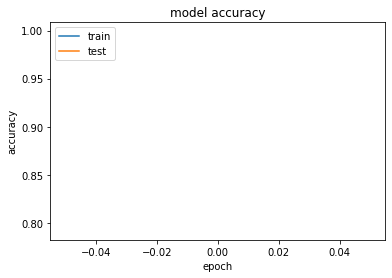

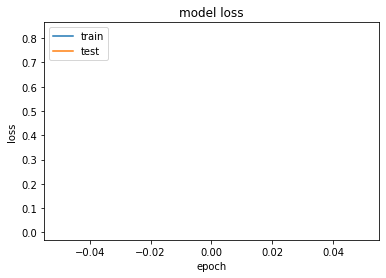

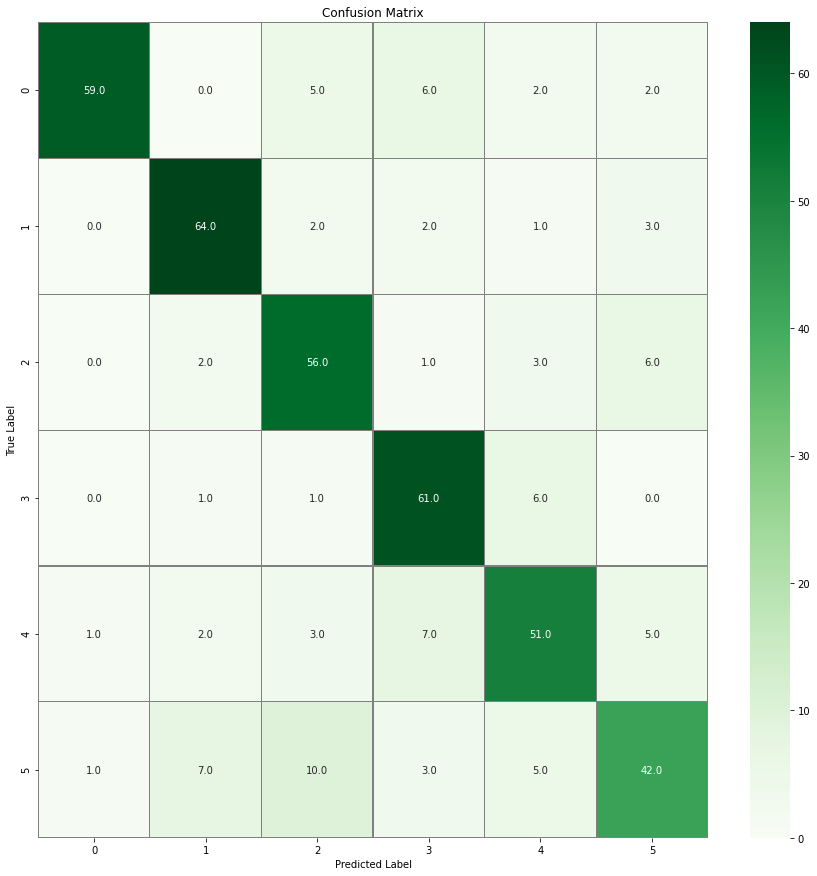

"\n# save to json:  \nhist_json_file = 'history.json' \nwith open(hist_json_file, mode='w') as f:\n    hist_df.to_json(f)\n\n# or save to csv: \nhist_csv_file = 'history.csv'\nwith open(hist_csv_file, mode='w') as f:\n    hist_df.to_csv(f)\n"

In [48]:
import pandas as pd

# assuming you stored your model.fit results in a 'history' variable:
#history = model.fit(x_train, y_train, epochs=10)

# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

def confussion_mat(model):
    # Predict the values from the validation dataset
    Y_pred = model.predict(data['X_test'])
    # Convert predictions classes to one hot vectors 
    Y_pred_classes = np.argmax(Y_pred,axis = 1) 
    # Convert validation observations to one hot vectors
    Y_true = np.argmax(data['y_test'],axis = 1) 
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    # plot the confusion matrix
    f,ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

def history2(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

history2(history)
confussion_mat(model)

'''
# save to json:  
hist_json_file = 'history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv: 
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)
'''

In [ ]:
from keras.models import load_model
model = load_model('saved-model.hdf5')# loading model trained for 50 Epochs

#hstry = model.fit_generator(......) # training the model for another 50 Epochs
hstry = model.fit(data['X_train'], data['y_train'], validation_data=(data['X_test'], data['y_test']), epochs=5, verbose=2)


model.save("trainedmodel_Epoch.h5") # saving the model 

with open('trainHistoryOld', 'wb') as handle: # saving the history of the model trained for another 50 Epochs
    dump(hstry.history, handle)

from pickle import load
import matplotlib.pyplot as plt

with open('trainHistoryOld', 'rb') as handle: # loading old history 
    oldhstry = load(handle)

oldhstry['loss'].extend(hstry['loss'])
oldhstry['acc'].extend(hstry['acc'])
oldhstry['val_loss'].extend(hstry['val_loss'])
oldhstry['val_acc'].extend(hstry['val_acc'])

# Plotting the Accuracy vs Epoch Graph
plt.plot(oldhstry['acc'])
plt.plot(oldhstry['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plotting the Loss vs Epoch Graphs
plt.plot(oldhstry['loss'])
plt.plot(oldhstry['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.datasets import make_classification
# from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
    
Y_pred = model.predict(data['X_test'])
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(data['y_test'],axis = 1) 
# compute the confusion matrix
print("f1-score:")
print(f1_score(Y_true, Y_pred_classes, average="macro"))
print("precision_score:")
print(precision_score(Y_true, Y_pred_classes, average="macro"))
print("recall_score:")
print(recall_score(Y_true, Y_pred_classes, average="macro")) 

# print("F1-score: {:.1%}".format(f1_score(Y_true, Y_pred_classes)))
print(classification_report(Y_true, Y_pred_classes))


f1-score:
0.7040279042068117
precision_score:
0.708517730980176
recall_score:
0.7086459861395923
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        74
           1       0.73      0.56      0.63        72
           2       0.76      0.71      0.73        68
           3       0.73      0.86      0.79        69
           4       0.64      0.77      0.70        69
           5       0.61      0.53      0.57        68

    accuracy                           0.71       420
   macro avg       0.71      0.71      0.70       420
weighted avg       0.71      0.71      0.71       420



In [ ]:
print(f1_score(data['y_test'], Y_pred, average="macro"))
print(precision_score(data['y_test'], Y_pred, average="macro"))
print(recall_score(data['y_test'], Y_pred, average="macro")) 

ValueError: ignored